In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 10**3

лейблы для графиков

In [3]:
labels = ['$2 \cdot \overline{X}$','$\overline{X} + \\frac{X_{(n)}}{2}$',
          '$\\frac{(n + 1)}{n} \cdot X_{(n)}$',
           '$X_{(1)} + X_{(n)}$' , '$(n + 1) \cdot X_{(1)}$']

## Функция для построения графиков

ylimit - контролирует размер графика по вертикали

num - количество функций,которые получаются (нужно,чтобы построить график без функции $(n + 1) \cdot X_{(1)}$ )

если нужно - то передается 4, иначе-3

In [30]:
def uniform_distribution(theta, N, ylim, num):
    samples = []
    for i in range(100):
        # генерируем 100 выборок
        samples.append(sps.uniform.rvs(loc = 0, scale = theta, size = N))
    means = [] # массив средних для каждой выборки
    maxes = [] # массив максимумов для каждой выборки
    mines = [] # массив минимумов для каждой выборки
    evals = np.zeros((100, N , num + 1)) # массив массивов с оценками
    for j in range(100) :
        means.append([np.mean(samples[j][:(i + 1)]) for i in xrange(N)])
        maxes.append([np.max(samples[j][:(i + 1)]) for i in xrange(N)])
        mines.append([np.min(samples[j][:(i + 1)]) for i in xrange(N)])
        evals[j][:,0] = map(lambda x: 2 * x, means[j])
        evals[j][:,1] = [means[j][i] +  maxes[j][i] / 2 for i in xrange(N)]
        evals[j][:,2] = [maxes[j][i] * ((i + 2.) / (i + 1) )
                         for i in xrange(N)]
        evals[j][:,3] = [maxes[j][i] + mines[j][i] for i in xrange(N)]
        if num == 4:
            evals[j][:,4] = [(i + 2) * mines[j][i] for i in xrange(N)]
        
    # квадратичная функция потерь    
    quadr_loss_func = map(lambda x : (x - theta) ** 2, evals)
    
    # усреднение по выборкам
    quadr_mean = []
    for k in range(num + 1) :
        quadr_mean.append([np.mean([quadr_loss_func[j][i][k]
                                    for j in range(100)]) for i in xrange(N)])
    
    
    # построение графика
    x = [i for i in xrange(N)]
    for j in range(num + 1):
        plot = plt.plot(x, [quadr_mean[j][i] for i in x], linewidth = 2,
                        label = labels[j])
        plt.ylim(0,ylim)
        plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
        plt.grid() 
    plt.show()
  
        
            
    

## $\theta=$ 1

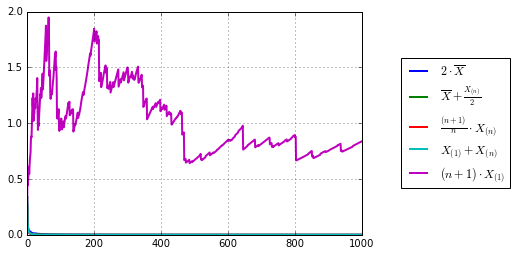

In [10]:
uniform_distribution(1, N, 2, 4)

### График без $(n+1)X_{(1)}$ 

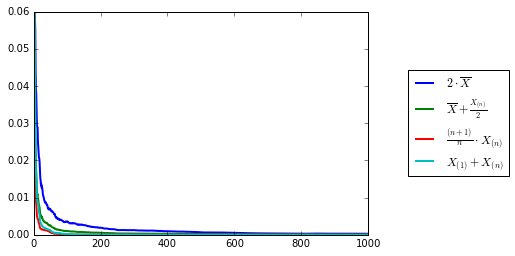

In [19]:
uniform_distribution(1,N,0.06,3)

## $\theta=$ 5

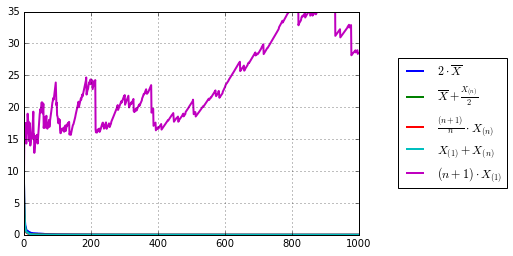

In [18]:
uniform_distribution(5,N,35,4)

### График без $(n+1)X_{(1)}$ 

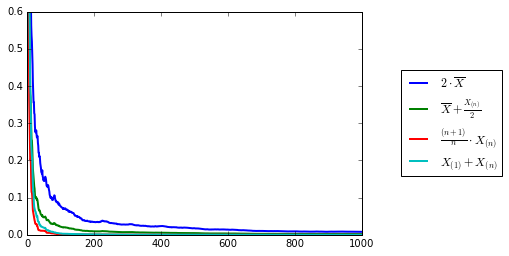

In [23]:
uniform_distribution(5,N,0.6,3)

## $\theta=$ 10

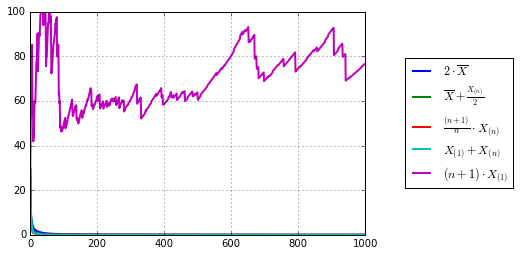

In [26]:
uniform_distribution(10,N,100,4)

### График без $(n+1)X_{(1)}$ 

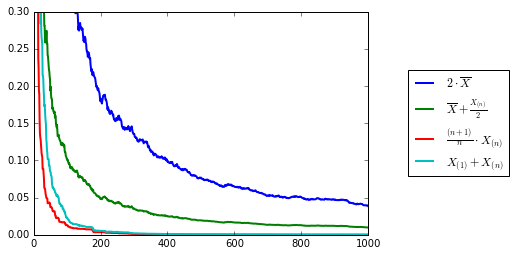

In [29]:
uniform_distribution(10,N,0.3,3)